# Tokens per File
First, load in the file. The index is the number of tokens in the file. There is a column for each dataset. A cell represents the number of files in the dataset which contain the specified number of tokens.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

COLORS = {
    'BIG': '#66CDAA',
    'CVS': '#FF0000',
    'JLT': '#FFD700',
    'MNY': '#C71585',
    'NTR': '#00FF00',
    'TBO': '#0000FF',
    'VDC': '#1E90FF',
    'WILD': '#000000',
}

plt.style.use(['science', 'no-latex' ])

df = pd.read_csv('data/by_dataset/tokens_histogram.csv')
df

df_log = df.copy()
df_log['tokens_log'] = np.round(np.log10(df_log.tokens_count), 3)
df_log = df_log.groupby('tokens_log').sum().reset_index()
df_log.iloc[:, 1:] = df_log.iloc[:, 1:] / df_log.iloc[:, 1:].sum(axis=0)
df_log = df_log.sort_values(by='tokens_log', ascending=True)
df_log = df_log[list(df_log.columns[:2]) + sorted(df_log.columns[2:])]

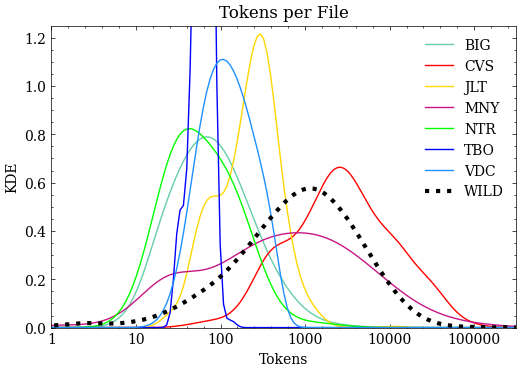

In [2]:
fig = plt.figure(figsize=(6, 4), dpi=100)
ax = fig.gca()

for col in df_log.columns[2:]:
    if col == 'WILD':
        sns.kdeplot(df_log.tokens_log, weights=df_log[col], color=COLORS[col], ax=ax, linewidth=3, linestyle=':')
    else:
        sns.kdeplot(df_log.tokens_log, weights=df_log[col], color=COLORS[col], ax=ax)

ax.legend(df_log.columns[2:])
ax.set_xticks(np.arange(0, 14))
ax.set_xticklabels(10**np.arange(0, 14))
ax.set_xlabel('Tokens')
ax.set_ylabel('KDE')
ax.set_title('Tokens per File')
ax.set_xlim(left=0, right=5.5)
ax.set_ylim(top=1.25)
plt.savefig('img/tokens-per-file.jpg')
plt.show()

In [3]:
from scipy.stats import energy_distance

dists = pd.DataFrame(columns=df.columns[1:], index=df.columns[1:])

for a_col in dists.columns:
    for b_col in dists.columns:
        a = df_log[a_col]
        b = df_log[b_col]
        nrg = energy_distance(df_log.tokens_log, df_log.tokens_log, u_weights=a, v_weights=b)
        dists.at[a_col, b_col] = np.round(nrg, 3)

dists

,BIG,CVS,JLT,MNY,NTR,TBO,VDC,WILD
BIG,0.0,1.361,0.513,0.765,0.253,0.375,0.265,0.958
CVS,1.361,0.0,1.08,0.607,1.499,1.571,1.291,0.459
JLT,0.513,1.08,0.0,0.537,0.705,0.784,0.333,0.651
MNY,0.765,0.607,0.537,0.0,0.919,1.016,0.717,0.219
NTR,0.253,1.499,0.705,0.919,0.0,0.402,0.449,1.115
TBO,0.375,1.571,0.784,1.016,0.402,0.0,0.497,1.198
VDC,0.265,1.291,0.333,0.717,0.449,0.497,0.0,0.878
WILD,0.958,0.459,0.651,0.219,1.115,1.198,0.878,0.0
